   Welcome to Activity context recognition system, Check accuracy using ML models  
Please enter the path with file name of your input file: 
/Users/oshadirathnayake/Documents/PCP/Pycharm/activity_context_tracking_data.csv
Prepairing your data............ 
Training your data............ 
would you like to see the accuracy for all three models? (enter 'Y' if yes /enter 'N' if no): 
y
Getting Random Forest algorithm Accuracy............ 
Random forest Score is:-   99.97 %
Getting Naive Bayes algorithm Accuracy............ 
Naive Bayes algorithm :-   55.95 %
Getting K-Nearest Neighbours algorithm Accuracy............ 
K-Nearest Neighbours algorithm:-  98.95 %
Getting Logistic Regression algorithm Accuracy............ 
Logistic Regression algorithm :-   79.11 %
Highest accuracy model is : 
Random Forest Model with the Accuracy of :  99.97 %
Following is the bar chart of accuracies:
Thank you for using Activity context recognition system. Have a good day!


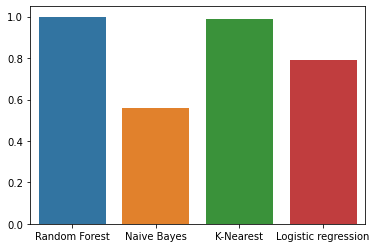

In [1]:
#import feature_module
import load_dataset_module
import traceback
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import os.path

def main():
    
    try:
        print("===================================================================================")
        print("   Welcome to Activity context recognition system, Check accuracy using ML models  ")
        print("===================================================================================")

        print("Please enter the path with file name of your input file: ")
        file_path = input()
        fileExist = os.path.exists(file_path)
        myfile = "no"
        if fileExist == True:
            myfile="yes"
        else:
            myfile="no"
#            print("The file path is not exist! Please enter a valid input!")
#         print("would you like to check all the accuracies of ML models by this data set? (enter 'Y' if yes /enter 'N' if no): ")
#         calculate_All = input()      
#         if calculate_All == 'Y' or calculate_All == 'y':
        if  myfile == "yes":   
            print("Prepairing your data............ ")

            activity_data_object = load_dataset_module.Load_Dataset_Module.activity_data(file_path)
            data = load_dataset_module.Load_Dataset_Module.activity_features(activity_data_object)
            data.drop(data.columns[[0,1]], axis = 1, inplace = True)
            X= data.drop('activity', axis=1)
            y = data['activity']

            print("Training your data............ ")

            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)

            print("would you like to see the accuracy for all three models? (enter 'Y' if yes /enter 'N' if no): ")          
            all_models=input()

            if all_models == 'Y' or all_models == 'y':
                print("Getting Random Forest algorithm Accuracy............ ")              
                rd =  RandomForestClassifier(n_estimators=150)
                rd_model = rd.fit(X_train,y_train)
                predict_rd = rd_model.predict(X_test)              
                rd_score = accuracy_score(predict_rd, y_test)
                print("Random forest Score is:-  ", round(rd_score*100,2),"%")
                print("Getting Naive Bayes algorithm Accuracy............ ")

                modelNB = GaussianNB()
                nb_model=modelNB.fit(X_train, y_train)
                predict_NB  =  nb_model.predict(X_test)
                nb_score = accuracy_score(predict_NB, y_test)
                print("Naive Bayes algorithm :-  ",round(nb_score*100,2),"%")               
                print("Getting K-Nearest Neighbours algorithm Accuracy............ ")

                knn = KNeighborsClassifier(n_neighbors=7)
                knn_model = knn.fit(X_train, y_train)
                predict_knn = knn_model.predict(X_test)               
                knn_score = accuracy_score(predict_knn, y_test)
                print("K-Nearest Neighbours algorithm:- ", round(knn_score*100,2),"%")
                print("Getting Logistic Regression algorithm Accuracy............ ")


                logiReg = LogisticRegression(solver='liblinear', random_state=0)
                logiReg_Model=logiReg.fit(X_train, y_train)
                predict_logireg = logiReg_Model.predict(X_test) 
                logireg_score= accuracy_score(predict_logireg, y_test)
                print("Logistic Regression algorithm :-  ",round(logireg_score*100,2),"%")  

                print("=============================================================== ")
                score_list = [rd_score,nb_score,knn_score,logireg_score]
                highest_Accu=max(score_list)
                if highest_Accu == rd_score:
                    print ("Highest accuracy model is : ")
                    print ("Random Forest Model with the Accuracy of : ", round(highest_Accu*100,2),"%")
                elif highest_Accu == nb_score:
                    print ("Highest accuracy model is : ")
                    print ("Naive Bayes Model with the Accuracy of : ", round(highest_Accu*100,2),"%")
                if highest_Accu == knn_score:
                    print ("Highest accuracy model is : ")
                    print ("K-Nearest Neighbours Model with the Accuracy of : ", round(highest_Accu*100,2),"%")
                elif highest_Accu == logireg_score:
                    print ("Highest accuracy model is : ")
                    print ("Logistic Regression Model with the Accuracy of : ", round(highest_Accu*100,2),"%")
                print("=============================================================== ")
                print ("Following is the bar chart of accuracies:")   
                sns.barplot(x=['Random Forest','Naive Bayes','K-Nearest','Logistic regression'], y=[rd_score,nb_score,knn_score,logireg_score])
                print("=============================================================== ")
            elif all_models == 'N' or all_models == 'n':
                    print("which model would you like to see the accuracy? ")
                    print("Enter 1 for K-Nearest Neighbours algorithm")
                    print("Enter 2 for Naive Bayes algorithm")
                    print("Enter 3 for Random Forest Classifier algorithm")
                    print("Enter 4 for Logistic Regression Classifier algorithm")
                    which_Model = input()

                    if which_Model == '3':
                        print("Getting Random Forest algorithm Accuracy............ ")  
                        rd =  RandomForestClassifier(n_estimators=150)
                        rd_model = rd.fit(X_train,y_train)
                        predict_rd = rd_model.predict(X_test)
                        rd_score = accuracy_score(predict_rd, y_test)
                        print("Random forest Score is:-  ", round(rd_score*100,2),"%")

                    elif which_Model == '2':
                        print("Getting Naive Bayes algorithm Accuracy............ ")
                        modelNB = GaussianNB()
                        nb_model=modelNB.fit(X_train, y_train)
                        predict_NB  =  predict_NB.predict(X_test)
                        nb_score = accuracy_score(predict_NB, y_test)
                        print("Naive Bayes algorithm :-  ",round(nb_score*100,2),"%")


                    elif which_Model == '1':  
                        print("Getting K-Nearest Neighbours algorithm Accuracy............ ")
                        knn = KNeighborsClassifier(n_neighbors=7)
                        knn_model = knn.fit(X_train, y_train)
                        predict_knn = knn_model.predict(X_test)
                        knn_score = accuracy_score(predict_knn, y_test)
                        print("K-Nearest Neighbours algorithm:- ",round(knn_score*100,2),"%")

                    elif which_Model == '4':
                        print("Getting Logistic Regression algorithm Accuracy............ ")
                        logiReg = LogisticRegression(solver='liblinear', random_state=0)
                        logiReg_Model=logiReg.fit(X_train, y_train)
                        predict_logireg = logiReg_Model.predict(X_test) 
                        logireg_score= accuracy_score(predict_logireg, y_test)
                        print("Logistic Regression algorithm :-  ",round(logireg_score*100,2),"%")  


                    else:
                        print("Please enter a valid input!!")

            else:
                print("The file path is not exist! Please enter a valid input!")
        else:
            print("The file path is not exist! Please enter a valid input!")
    except:
        traceback.print_exc()

        print("=====================================================")
        print("Ohhhhh! Something went wrong! Please try again later!")
        print("=====================================================")
    finally:
        print("=========================================================================")
        print("Thank you for using Activity context recognition system. Have a good day!")
        print("=========================================================================")

main()



